http://data.biancheng.net/view/186.html

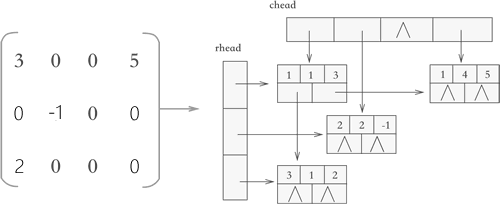 

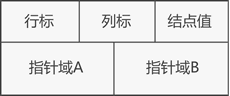

In [176]:
import numpy as np

class Node:
    """
    The node of cell info.
    """
    def __init__(self, row_idx, col_idx, val):
        """
        row_idx: row index
        col_idx: column index
        val: node value
        
        """
        self.row_idx = row_idx        
        self.col_idx = col_idx
        self.val = val
        self.down_ptr = None
        self.right_ptr = None
    
    def __str__(self,):
        """
        Format print.
        
        """
        return "row: %s, col:%s, val:%s" % (self.row_idx, self.col_idx, self.val)

    
class cross_link:
    """
    十字链表
    
    """
    
    def __init__(self, m, n):
        """
        m: row count
        n: col_count
        
        """
        self.m = m
        self.n = n
        self.c_head = [None for i in range(self.m)]
        self.r_head = [None for i in range(self.n)]
    
    def insert(self, r_i, c_i, val):
        """
        insert value to matrix.
        
        params:
        r_i: row index:
        c_i: column index
        val: value
        
        """
        node = Node(r_i, c_i, val) 
        
        # insert row
        if not self.r_head[r_i]:
            self.r_head[r_i] = node
        else:
            crt_node = self.r_head[r_i]
            while crt_node.right_ptr:
                crt_node = crt_node.right_ptr
            crt_node.right_ptr = node
        
        # insert column
        if not self.c_head[c_i]:
            self.c_head[c_i] = node
        else:
            crt_node = self.c_head[c_i]
            while crt_node.down_ptr:
                crt_node = crt_node.down_ptr
            crt_node.down_ptr = node
    
    def row(self, row_i):
        """
        Get i row data.
        
        """
        r_matrix = np.zeros((1, self.n))
        crt_node = self.r_head[row_i]
        while crt_node:
            c_i = crt_node.col_idx
            val = crt_node.val
            r_matrix[0][c_i] = val
            crt_node = crt_node.right_ptr
    
        return r_matrix
    
    def row_sum(self, row_i):
        """
        Get i row sum.
        
        """
        r_sum = 0
        crt_node = self.r_head[row_i]
        while crt_node:
            val = crt_node.val
            r_sum += val
            crt_node = crt_node.right_ptr
    
        return r_sum    

    def col(self, col_i):
        """
        Get i col data.
        
        """
        c_matrix = np.zeros((self.m, 1))
        crt_node = self.c_head[col_i]
        while crt_node:
            r_i = crt_node.row_idx
            val = crt_node.val
            c_matrix[r_i][0] = val
            crt_node = crt_node.down_ptr
    
        return c_matrix
    
    def col_sum(self, col_i):
        """
        Get i col sum.
        """
        c_sum = 0
        crt_node = self.c_head[col_i]
        while crt_node:
            val = crt_node.val
            c_sum += val
            crt_node = crt_node.down_ptr
    
        return c_sum      
    
    def display(self,):
        """
        Get origin matrix.
        
        """
        o_matrix = np.zeros((self.m, self.n))
        for i in range(self.m):
            if not self.r_head[i]:
                continue
            crt_node = self.r_head[i]
            while crt_node:
                r_i = crt_node.row_idx
                c_i = crt_node.col_idx
                val = crt_node.val
                o_matrix[r_i][c_i] = val
                crt_node = crt_node.right_ptr
        return o_matrix

In [180]:
cl = cross_link(10, 10)
cl.insert(2, 3, 50)
cl.insert(2, 4, 34)
cl.insert(3, 3, 50)
cl.insert(2, 5, 54)

In [181]:
print cl.display()

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 50. 34. 54.  0.  0.  0.  0.]
 [ 0.  0.  0. 50.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
